In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
datacarrental = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/carrental%202019.csv')
datacarrental

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,...,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status,confirm_at,complete_at,cancel_at
0,12/31/2019 19:34,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,...,0.0,0.0,0.0,42693.0,0,0.0,complete,12/31/2019 20:46,1/7/2020 22:44,NaN
1,12/31/2019 14:02,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,...,0.0,300.0,0.0,1999.2,5000,98.0,complete,48:18.7,15:30.3,NaN
2,12/31/2019 9:37,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,...,0.0,0.0,0.0,1048.6,5000,0.0,complete,48:50.6,48:31.4,NaN
3,12/30/2019 23:05,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,...,0.0,0.0,0.0,1358.9,0,0.0,complete,06:24.2,28:00.5,NaN
4,12/30/2019 20:28,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,...,0.0,300.0,0.0,2203.2,0,108.0,complete,38:36.1,15:30.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,1/4/2019 16:01,DM2551-11316,web,credit,2551:Mitsubishi Attrage,private,Mitsubishi,Attrage,car,2.0,...,0.0,0.0,0.0,1990.2,10000,0.0,complete,1/4/2019 16:01,NaN,NaN
3200,1/4/2019 15:54,DM2551-11314,web,credit,2551:Mitsubishi Attrage,private,Mitsubishi,Attrage,car,3.0,...,0.0,0.0,0.0,2985.3,10000,0.0,complete,1/4/2019 15:54,NaN,NaN
3201,1/4/2019 8:31,DM3984-11303,web,transfer,3984:Toyota Vios,local,Toyota,Vios,car,2.0,...,0.0,0.0,0.0,2889.0,5000,0.0,complete,1/4/2019 8:31,NaN,NaN
3202,1/2/2019 16:06,DM3477-11297,ios,credit,3477:Mini Cooper Hatch 3 door,private,Mini,Cooper Hatch 3 door,car,1.0,...,0.0,0.0,0.0,6077.6,20000,0.0,complete,1/2/2019 16:06,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created_at               3204 non-null   object 
 1   order_id                 3204 non-null   object 
 2   rent_channel             3204 non-null   object 
 3   payment_method           3201 non-null   object 
 4   car                      3121 non-null   object 
 5   car__owner__user_status  3121 non-null   object 
 6   car__brand               3121 non-null   object 
 7   car__model               3121 non-null   object 
 8   rental_category          3195 non-null   object 
 9   total_period             3204 non-null   float64
 10  price_per_day            3204 non-null   float64
 11  total_price              3204 non-null   float64
 12  insurance_price          3203 non-null   float64
 13  insurance_amount         3204 non-null   int64  
 14  vat_amount              

In [9]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['month'] = data['created_at'].dt.month_name('eng')

In [10]:
data = data.sort_values(by='created_at')
data = data.reset_index(drop=True)
pd.concat([data.head(3), data.tail(3)])

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,...,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status,confirm_at,complete_at,cancel_at,month
0,2019-01-02 10:11:00,DM683-11293,ios,credit,683:Hyundai H1,private,Hyundai,H1,car,5.0,...,0.0,0.0,17120.0,20000,0.0,complete,1/2/2019 10:11,NaN,NaN,January
1,2019-01-02 16:06:00,DM3477-11297,ios,credit,3477:Mini Cooper Hatch 3 door,private,Mini,Cooper Hatch 3 door,car,1.0,...,0.0,0.0,6077.6,20000,0.0,complete,1/2/2019 16:06,NaN,NaN,January
2,2019-01-04 08:31:00,DM3984-11303,web,transfer,3984:Toyota Vios,local,Toyota,Vios,car,2.0,...,0.0,0.0,2889.0,5000,0.0,complete,1/4/2019 8:31,NaN,NaN,January
3201,2019-12-31 09:37:00,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,...,0.0,0.0,1048.6,5000,0.0,complete,48:50.6,48:31.4,NaN,December
3202,2019-12-31 14:02:00,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,...,300.0,0.0,1999.2,5000,98.0,complete,48:18.7,15:30.3,NaN,December
3203,2019-12-31 19:34:00,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,...,0.0,0.0,42693.0,0,0.0,complete,12/31/2019 20:46,1/7/2020 22:44,NaN,December


In [11]:
data.groupby('rent_channel').count()['order_id']

rent_channel
android     233
ios         421
line        269
phone       693
web        1588
Name: order_id, dtype: int64

In [12]:
data.groupby('rent_channel').sum()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding
rent_channel,,,,,,,,,,,,,
android,534.5,3.938612e+05,811389.00,56810.00,128910,63285.5100,1.768240e+05,24660.35,13260.0,1000.0,9.668507e+05,980000,513.5000
ios,1073.5,9.859600e+05,1949171.00,93080.00,242350,147855.5900,4.290063e+05,41460.80,41237.5,1900.0,2.260678e+06,1920003,0.0000
line,1585.0,4.495416e+05,1635722.53,34823.43,140430,119582.3700,3.635654e+05,55648.50,6399.0,0.0,1.819657e+06,1080000,15181.0000
phone,3603.0,8.865858e+05,4023676.88,32031.29,94159,283040.5475,1.139007e+06,49823.00,14270.0,0.0,4.336229e+06,1985000,21582.4000
web,4198.0,2.403057e+06,6122946.50,269630.00,712290,455325.4200,1.339862e+06,125757.40,200658.9,9700.0,6.900265e+06,6760000,61298.4555


In [13]:
data.groupby('rent_channel').mean()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding
rent_channel,,,,,,,,,,,,,
android,2.293991,1690.391202,3482.356223,243.819742,553.261803,271.611631,758.901341,105.838412,56.909871,4.291845,4149.573648,4206.008584,2.203863
ios,2.549881,2341.947743,4629.859857,221.092637,575.653207,351.200926,1019.017340,98.481710,97.951306,4.513064,5369.782162,4560.577197,0.000000
line,5.892193,1671.158401,6080.752900,129.938172,522.044610,444.544126,1351.544377,207.643657,23.788104,0.000000,6764.524126,4014.869888,56.645522
phone,5.199134,1279.344546,5806.171544,46.221198,135.871573,408.427918,1643.588314,71.894661,20.591631,0.000000,6257.184517,2864.357864,31.143434
web,2.643577,1513.259880,3855.759761,169.792191,448.545340,286.728854,843.742031,79.192317,126.359509,6.108312,4345.254845,4256.926952,38.601043


In [14]:
data.groupby('rent_channel').median()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding
rent_channel,,,,,,,,,,,,,
android,2.0,1100.00,2400.0,280.0,280.0,179.06,540.0000,0.0,0.0,0.0,2737.06,5000.0,0.0
ios,2.0,1200.00,2550.0,280.0,280.0,210.00,600.0000,0.0,0.0,0.0,3210.00,5000.0,0.0
line,2.0,1200.00,3500.0,0.0,0.0,245.00,750.0000,0.0,0.0,0.0,3745.00,5000.0,0.0
phone,1.0,747.66,747.7,0.0,0.0,52.34,210.2825,0.0,0.0,0.0,800.00,0.0,0.0
web,2.0,1100.00,2550.0,0.0,0.0,198.10,599.7000,0.0,0.0,0.0,2998.80,5000.0,0.0


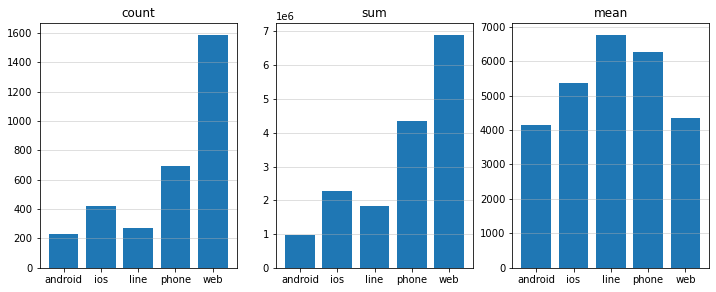

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4.5))
x1 = data.groupby('rent_channel').count()['order_id']
x2 = data.groupby('rent_channel').sum()['total_amount']
x3 = data.groupby('rent_channel').mean()['total_amount']
axs[0].bar(x1.index, x1.values)
axs[0].grid(axis='y', alpha=0.5)
axs[0].set_title('count')
axs[1].bar(x2.index, x2.values)
axs[1].grid(axis='y', alpha=0.5)
axs[1].set_title('sum')
axs[2].bar(x3.index, x3.values)
axs[2].grid(axis='y', alpha=0.5)
axs[2].set_title('mean')
plt.show()

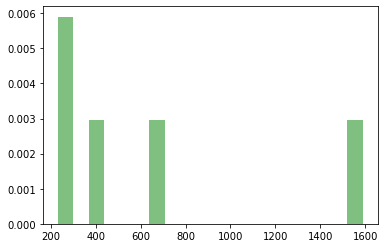

In [19]:
plt.hist(x1, 20,
         density=True,
         histtype='bar',
         facecolor='g',
         alpha=0.5)

plt.show()

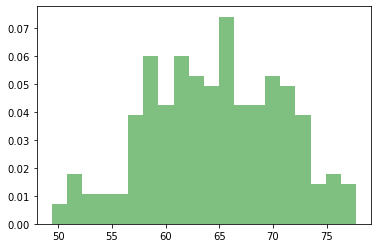

In [26]:
mu=65
sigma=6
x2 = np.random.normal(mu, sigma, size=200)
plt.hist(x2, 20,
         density=True,
         histtype='bar',
         facecolor='g',
         alpha=0.5)

plt.show()

In [29]:
data.describe()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding
count,3204.000000,3204.000000,3204.000000,3203.000000,3204.000000,3204.000000,3204.000000,3203.000000,3204.000000,3203.000000,3204.000000,3204.000000,3203.000000
mean,3.431336,1597.692016,4538.984366,151.849741,411.404182,333.673358,1076.237452,92.834858,86.087828,3.933812,5082.296974,3971.598939,30.775946
std,5.990337,5710.345390,10935.219654,215.835668,851.681707,764.530903,4060.185364,829.128406,473.727057,41.257687,11630.301453,4908.988156,184.318606
min,1.000000,350.000000,390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,800.000000,1200.000000,0.000000,0.000000,89.600000,225.000000,0.000000,0.000000,0.000000,1369.600000,0.000000,0.000000
50%,2.000000,1000.000000,2400.000000,0.000000,0.000000,176.400000,525.000000,0.000000,0.000000,0.000000,2675.000000,5000.000000,0.000000
75%,3.000000,1500.000000,4447.500000,280.000000,560.000000,333.900000,1000.000000,0.000000,0.000000,0.000000,5093.200000,5000.000000,0.000000
max,90.000000,300000.000000,300000.000000,710.000000,14880.000000,21000.000000,180000.000000,25000.000000,12240.000000,600.000000,321000.000000,50000.000000,4250.000000


In [30]:
num_columns = data.describe().columns
obj_columns = data.columns[data.dtypes=='object'].drop('status')
#Use status as target in classification

In [31]:
# Delete outliers
df = data
factor = 3
for col in num_columns:
    upper = data[col].mean() + data[col].std()*factor
    lower = data[col].mean() - data[col].std()*factor
    df = df[df[col] <= upper]
    df = df[df[col] >= lower]
df.describe()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding
count,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000
mean,2.237370,1275.639721,2797.361351,140.781082,322.167682,214.185187,620.689255,17.052060,43.908008,0.214977,3260.494670,2981.011465,16.494896
std,1.660364,1052.605494,2643.836176,201.400738,547.672555,198.602781,635.663148,139.506243,198.053918,4.632402,3023.404376,2861.686451,63.313312
min,1.000000,390.000000,390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,212.930000,0.000000,0.000000
25%,1.000000,800.000000,1065.000000,0.000000,0.000000,84.000000,186.915000,0.000000,0.000000,0.000000,1284.000000,0.000000,0.000000
50%,2.000000,1000.000000,2000.000000,0.000000,0.000000,161.000000,450.000000,0.000000,0.000000,0.000000,2439.600000,5000.000000,0.000000
75%,3.000000,1350.000000,3580.000000,280.000000,560.000000,264.075000,779.700000,0.000000,0.000000,0.000000,4012.500000,5000.000000,0.000000
max,20.000000,16000.000000,24000.000000,710.000000,2900.000000,1878.800000,6000.000000,2500.000000,1500.000000,100.000000,28718.800000,10000.000000,550.000000


In [32]:
print('Original shape =', data.shape)
print('Modified shape =', df.shape)

Original shape = (3204, 27)
Modified shape = (2791, 27)


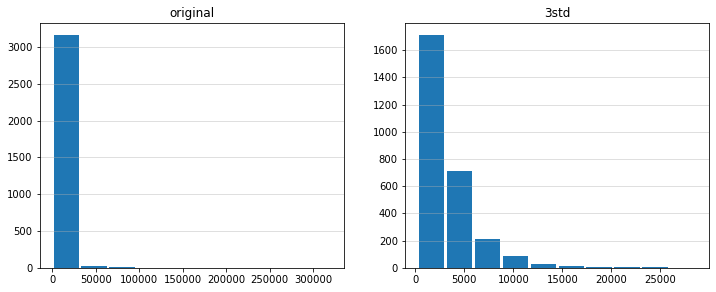

In [33]:
fig, axs = plt.subplots(1,2, figsize=(12, 4.5))
x = 'total_amount'
axs[0].hist(data[x], rwidth=0.9)
axs[1].hist(df[x], rwidth=0.9)
axs[0].grid(axis='y', alpha=0.5)
axs[1].grid(axis='y', alpha=0.5)
axs[0].set_title('original')
axs[1].set_title('3std')
plt.show()

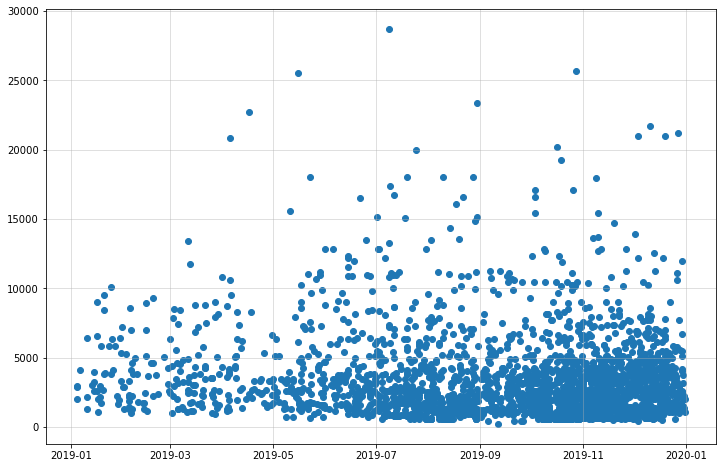

In [34]:
x = df['created_at']
y = df['total_amount']
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.grid(alpha=0.5)
plt.show()

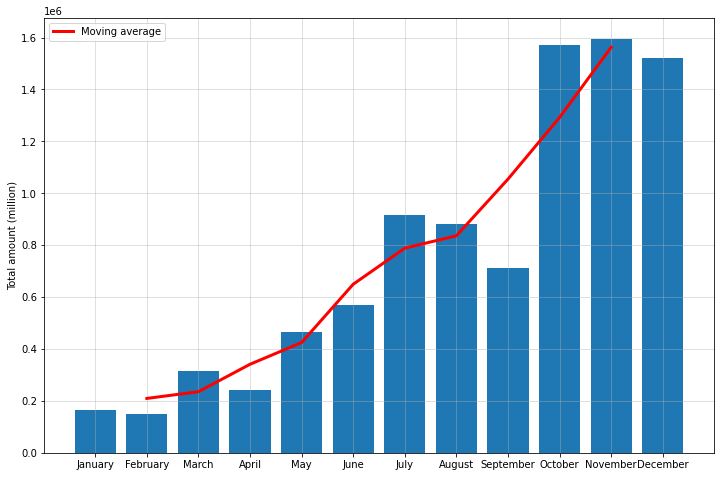

In [35]:
dat = df.groupby('month', sort=False).sum()['total_amount']
ma = dat.rolling(window = 3, center=True).mean()

plt.figure(figsize=(12,8))
plt.bar(dat.index, dat.values)
plt.plot(ma, c='r', linewidth=3, label='Moving average')
plt.ylabel('Total amount (million)')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression

X = np.arange(1, 13).reshape(-1,1)
y = dat.values

linear = LinearRegression().fit(X, y)
print('model acc =', linear.score(X, y))

X_fit = np.arange(1, 16).reshape(-1,1)
y_linear = linear.predict(X_fit)
print(y_linear)

model acc = 0.8782249211461071
[ -24087.80249359  118171.20136131  260430.2052162   402689.2090711
  544948.21292599  687207.21678089  829466.22063578  971725.22449068
 1113984.22834557 1256243.23220047 1398502.23605536 1540761.23991026
 1683020.24376515 1825279.24762005 1967538.25147494]


In [38]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2, include_bias=False)

X_ = transformer.fit_transform(X)

poly = LinearRegression().fit(X_, y)
print('model acc =', poly.score(X_, y))

X_fit_ = transformer.fit_transform(X_fit)
y_poly = poly.predict(X_fit_)
print(y_poly)

model acc = 0.9025380690040994
[ 117955.42343819  182736.30405757  263012.80932405  358784.93923764
  470052.69379833  596816.07300612  739075.07686101  896829.70536301
 1070079.95851211 1258825.83630832 1463067.33875162 1682804.46584203
 1918037.21757954 2168765.59396416 2434989.59499588]


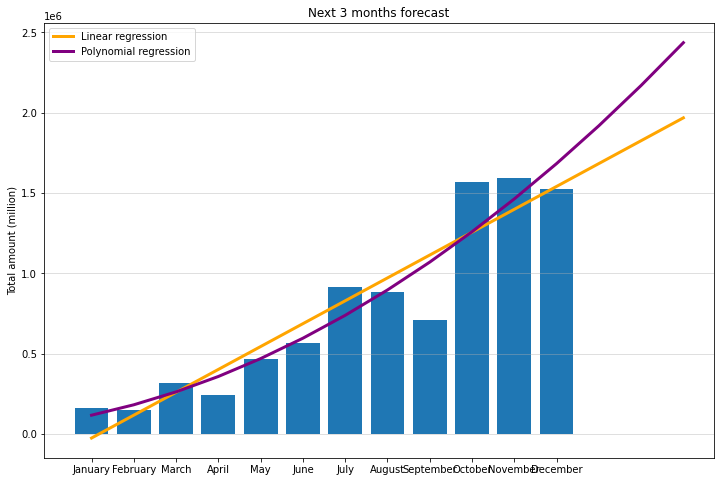

In [39]:
plt.figure(figsize=(12,8))
plt.bar(dat.index, dat.values)
plt.plot(y_linear, c='orange', linewidth=3, label='Linear regression')
plt.plot(y_poly, c='purple', linewidth=3, label='Polynomial regression')
plt.ylabel('Total amount (million)')
plt.grid(axis='y', alpha=0.5)
plt.title('Next 3 months forecast')
plt.legend()
plt.show()

In [40]:
df_log = df[num_columns].applymap(lambda x: np.log(x+1))
cols = [*obj_columns, 'status', 'created_at']
df_log = df_log.join(df[cols])
df_log.describe()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding
count,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000
mean,1.081799,7.001027,7.610624,2.170763,2.406840,5.042605,6.011367,0.129902,0.408707,0.009921,7.761108,4.738874,0.451263
std,0.406100,0.483387,0.794173,2.850098,3.194946,0.815352,0.954750,0.920272,1.562102,0.213791,0.808496,4.264878,1.448822
min,0.693147,5.968708,5.968708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.365649,0.000000,0.000000
25%,0.693147,6.685861,6.971570,0.000000,0.000000,4.442651,5.235990,0.000000,0.000000,0.000000,7.158514,0.000000,0.000000
50%,1.098612,6.908755,7.601402,0.000000,0.000000,5.087596,6.111467,0.000000,0.000000,0.000000,7.799999,8.517393,0.000000
75%,1.386294,7.208600,8.183397,5.638355,6.329721,5.580011,6.660191,0.000000,0.000000,0.000000,8.297419,8.517393,0.000000
max,3.044522,9.680406,10.085851,6.566672,7.972811,7.538921,8.699681,7.824446,7.313887,4.615121,10.265342,9.210440,6.311735


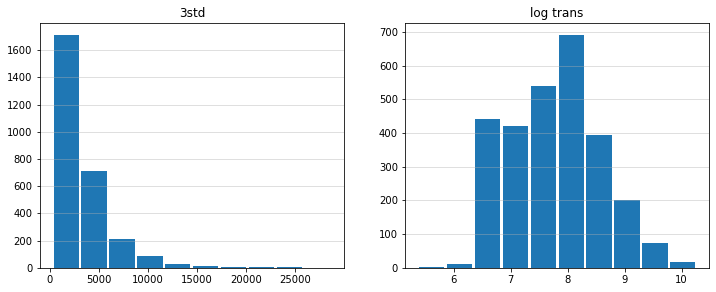

In [41]:
fig, axs = plt.subplots(1,2, figsize=(12, 4.5))
x = 'total_amount'
axs[0].hist(df[x], rwidth=0.9)
axs[1].hist(df_log[x], rwidth=0.9)
axs[0].grid(axis='y', alpha=0.5)
axs[1].grid(axis='y', alpha=0.5)
axs[0].set_title('3std')
axs[1].set_title('log trans')
plt.show()

In [42]:
df_ohe = df_log
for col in obj_columns.drop(['order_id', 'car']):
    cat_list = 'col'+'_'+col
    cat_list = pd.get_dummies(df_ohe[col], prefix=col)
    df_ohe = df_ohe.join(cat_list)
df_ohe = df_ohe.drop(columns=[*obj_columns, 'created_at'])
df_ohe.columns

Index(['total_period', 'price_per_day', 'total_price', 'insurance_price',
       'insurance_amount', 'vat_amount', 'commission', 'discount_amount',
       'promotion_amount', 'redeem_amount',
       ...
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September'],
      dtype='object', length=4640)

In [43]:
df_ohe['status'].value_counts()

complete    2536
cancel       224
success       29
failed         2
Name: status, dtype: int64

In [44]:
df_ohe.groupby('status').mean()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
status,,,,,,,,,,,,,,,,,,,,,
cancel,1.100040,6.985685,7.627369,1.912798,2.111670,5.012041,5.910991,0.024199,0.263304,0.000000,...,0.205357,0.004464,0.000000,0.004464,0.004464,0.000000,0.004464,0.236607,0.294643,0.187500
complete,1.077820,7.003351,7.606354,2.213342,2.454180,5.043414,6.017207,0.140826,0.419010,0.010919,...,0.158517,0.015773,0.015379,0.097792,0.056782,0.030757,0.042587,0.209779,0.185331,0.066246
failed,0.895880,7.143569,7.489893,0.000000,0.000000,4.838074,5.882701,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
success,1.301665,6.906380,7.863013,0.589633,0.712958,5.222041,6.284842,0.000000,0.659051,0.000000,...,0.344828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413793,0.137931,0.103448


In [45]:
df_ohe.groupby('status').sum()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
status,,,,,,,,,,,,,,,,,,,,,
cancel,246.409041,1564.793551,1708.530651,428.466742,473.014096,1122.697165,1324.061891,5.420535,58.980160,0.000000,...,46.0,1.0,0.0,1.0,1.0,0.0,1.0,53.0,66.0,42.0
complete,2733.350610,17760.499390,19289.714820,5613.034129,6223.799896,12790.098758,15259.637195,357.134592,1062.608630,27.690723,...,402.0,40.0,39.0,248.0,144.0,78.0,108.0,532.0,470.0,168.0
failed,1.791759,14.287138,14.979786,0.000000,0.000000,9.676148,11.765403,0.000000,0.000000,0.000000,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
success,37.748286,200.285018,228.027366,17.099366,20.675793,151.439195,182.260422,0.000000,19.112468,0.000000,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,4.0,3.0


In [46]:
df_ohe.groupby('status').median()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
status,,,,,,,,,,,,,,,,,,,,,
cancel,1.098612,6.907755,7.625786,0.0,0.0,5.113192,6.110913,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
complete,1.098612,6.908755,7.601402,0.0,0.0,5.083257,6.111467,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
failed,0.895880,7.143569,7.489893,0.0,0.0,4.838074,5.882701,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
success,1.386294,6.685861,7.804251,0.0,0.0,5.133207,6.398595,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_ohe = df_ohe[df['status']!='failed']
df_ohe['status'].value_counts()

complete    2536
cancel       224
success       29
Name: status, dtype: int64

In [48]:
df_succ = df_ohe[df['status']=='success']
df_succ['status'].value_counts()

C:\Users\PC\AppData\Local\Temp/ipykernel_32152/3101333000.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_succ = df_ohe[df['status']=='success']


success    29
Name: status, dtype: int64

In [49]:
df_ohe = df_ohe[df['status']!='success']
old_values = ['complete', 'cancel']
new_values = [1, 0]
df_ohe['status'] = df_ohe['status'].replace(old_values, new_values)
df_ohe['status'].value_counts()

C:\Users\PC\AppData\Local\Temp/ipykernel_32152/180455536.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ohe = df_ohe[df['status']!='success']


1    2536
0     224
Name: status, dtype: int64

In [50]:
df_ohe.groupby('status').mean()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
status,,,,,,,,,,,,,,,,,,,,,
0,1.10004,6.985685,7.627369,1.912798,2.11167,5.012041,5.910991,0.024199,0.263304,0.000000,...,0.205357,0.004464,0.000000,0.004464,0.004464,0.000000,0.004464,0.236607,0.294643,0.187500
1,1.07782,7.003351,7.606354,2.213342,2.45418,5.043414,6.017207,0.140826,0.419010,0.010919,...,0.158517,0.015773,0.015379,0.097792,0.056782,0.030757,0.042587,0.209779,0.185331,0.066246


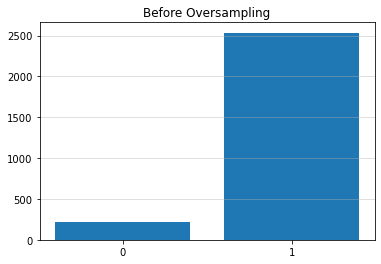

In [51]:
plt.bar(df_ohe['status'].unique(), df_ohe['status'].value_counts())
plt.xticks(df_ohe['status'].unique().astype(int))
plt.grid(axis='y', alpha=0.5)
plt.title('Before Oversampling')
plt.show()

In [52]:
X = df_ohe.drop(columns=['status'])
y = df_ohe['status']